In [308]:
'''Predict if patient will have diabetes on basis of various attributes

Pregnancies - No. of times the person was pregnant
Glucose - Glucose concentration level
BloodPressure - Diastolic Blood Pressure(mm Hg),measures the pressure in your arteries when your heart rests between beats.
Skin Thickness - Triceps Skin fold thickness(mm)
Insulin 2- Hour serum insulin, If your blood glucose level is still high 2 hours after you've eaten.
For those who don't have diabetes: less than 140 mg/dL
For those who have diabetes: less than 180 mg/dL
BMI Body mass index(weight) (weightin kg/(height in m)^2
DiabetesPedigree Function - Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age
Outcome : class variable (0 or 1)'''

"Predict if patient will have diabetes on basis of various attributes\n\nPregnancies - No. of times the person was pregnant\nGlucose - Glucose concentration level\nBloodPressure - Diastolic Blood Pressure(mm Hg),measures the pressure in your arteries when your heart rests between beats.\nSkin Thickness - Triceps Skin fold thickness(mm)\nInsulin 2- Hour serum insulin, If your blood glucose level is still high 2 hours after you've eaten.\nFor those who don't have diabetes: less than 140 mg/dL\nFor those who have diabetes: less than 180 mg/dL\nBMI Body mass index(weight) (weightin kg/(height in m)^2\nDiabetesPedigree Function - Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)\nAge\nOutcome : class variable (0 or 1)"

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
import scipy.stats as stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [310]:
df = pd.read_csv("diabetes_data.csv")

In [311]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [312]:
# By default top 5 rows will be displayed

In [313]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [314]:
# by default bottom 5rows will be displayed

In [315]:
df.dtypes # displays data types of the columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [316]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [317]:
df.shape

(768, 9)

In [318]:
# there are 768 rows and 9 columns in the dataset

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [320]:
# there are 768 non null values in data

In [321]:
# summary statistics of numerical column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [322]:
# here we see that min value of glucose, BP, SkinThickness, Insulin, BMI is zero which is practically not possible
# Hence in data cleaning, we have to replace them with median/mean value depending on the distribution
# Also in the max column we can see insulin levels are 846, hence we have to treat outliers
# Mean of age is 33.24
# lower quartile Q1 for bmi is 27.30 and upper quartile is 36.60

In [323]:
df.isnull().sum() # checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [324]:
# There are no null values in data

In [325]:
df["BMI"]

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [326]:
#checking for 0 values in 5 columns , Age and  DiabetesPedigreeFunction do not have have minimum value as 0 hence we need not replace any values
#number of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [327]:
# This shows the count of zero in our columns

### Meaures of Central Tendency

In [328]:
# Calculating Mean of BMI

In [329]:
BMI_mean = df.BMI.mean()
print("Mean of BMI is", BMI_mean)

Mean of BMI is 31.992578124999998


In [330]:
# this gives the mean of BMI and same is observed above in summary statistics

In [331]:
# To Calculate mean, median, and mode of a specific column, say age
mean_age = df["Age"].mean()
median_age = df["Age"].median()
mode_age = df["Age"].mode().values[0]

print("Mean of age:", mean_age)
print("Median of age:", median_age)
print("Mode of age:", mode_age)

Mean of age: 33.240885416666664
Median of age: 29.0
Mode of age: 22


In [332]:
# We can say that mean , median and mode of age is 33 , 29, 22

### Measures of Dispersion

In [333]:
# We are claculating this values for basic understanding, however this values will differ when we treat replace missing values 
# And when we treat outliers

In [334]:
df.Age.max(), df.Age.min()

(81, 21)

In [335]:
df.Age.max()- df.Age.min()

60

In [336]:
# range of Age is 60

In [337]:
df["Age"].std()

11.76023154067868

In [338]:
# Standard deviation of age is 11.760

In [339]:
df.BMI.var(), df.BMI.std()**2 

(62.15998395738257, 62.159983957382565)

In [340]:
#variance and std deviation of bmi is 62.15

### Measures of location

In [341]:
np.quantile(df.BMI,0.25)

27.3

In [342]:
# 23.63 is the first quartile of bmi column

In [343]:
np.quantile(df.BMI,1)

67.1

In [344]:
# 95.69 is the first quartile of bmi column

In [345]:
# Calculate the 25th, 50th (median), and 75th percentiles of a specific, say age
percentiles = np.percentile(df["Age"], [25, 50, 75])

print("25th Percentile of Age:", percentiles[0])
print("Median (50th Percentile) of Age:", percentiles[1])
print("75th Percentile of Age:", percentiles[2])

25th Percentile of Age: 24.0
Median (50th Percentile) of Age: 29.0
75th Percentile of Age: 41.0


In [346]:
# 25th, 50th and 75th percentile of Age is 24, 29 and 41

In [347]:
# Calculate any quantile in a column. this can be used to get the Q1, Q2, Q3, deciles or any percentiles also.

Q1_age = np.quantile(df["Age"],0.25)
median_age = np.quantile(df["Age"],0.5)
Q3_age = np.quantile(df["Age"],0.75)

IQR_age = Q3_age - Q1_age

a_quantile_age = np.quantile(df["Age"],0.3145)

print("first quartile:", Q1_age)
print("third quartile:", Q3_age)
print("IQR:", IQR_age)
print("median or Q2:", median_age)

first quartile: 24.0
third quartile: 41.0
IQR: 17.0
median or Q2: 29.0


In [348]:
np.percentile(df.Age,25), np.quantile(df.Age,0.25)

(24.0, 24.0)

### Data Visualisation

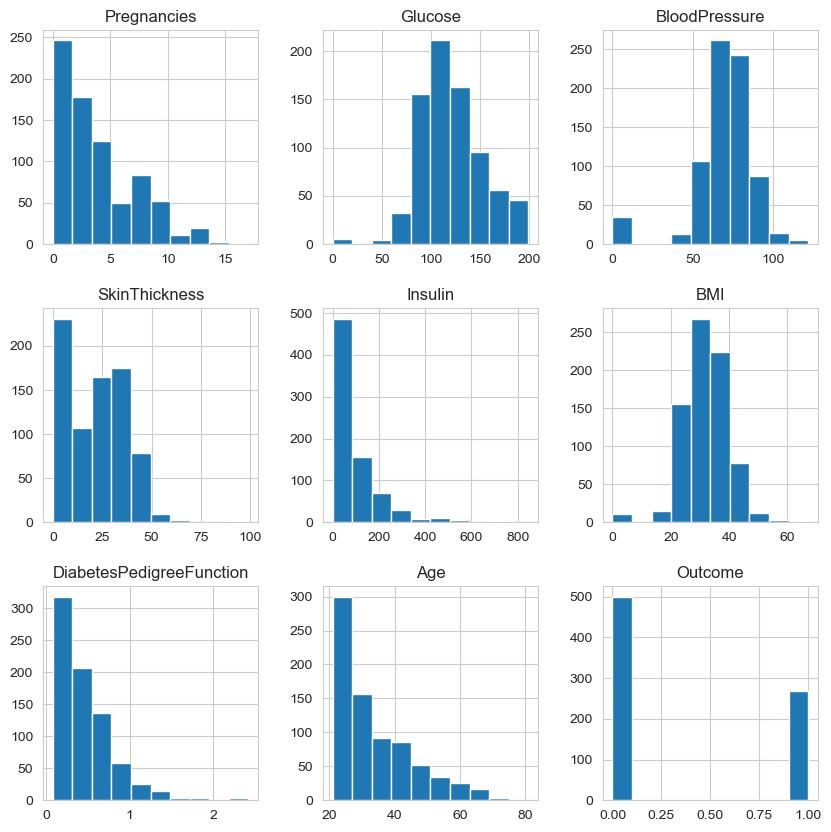

In [349]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()


In [350]:
# We see that Glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<Axes: xlabel='DiabetesPedigreeFunction'>

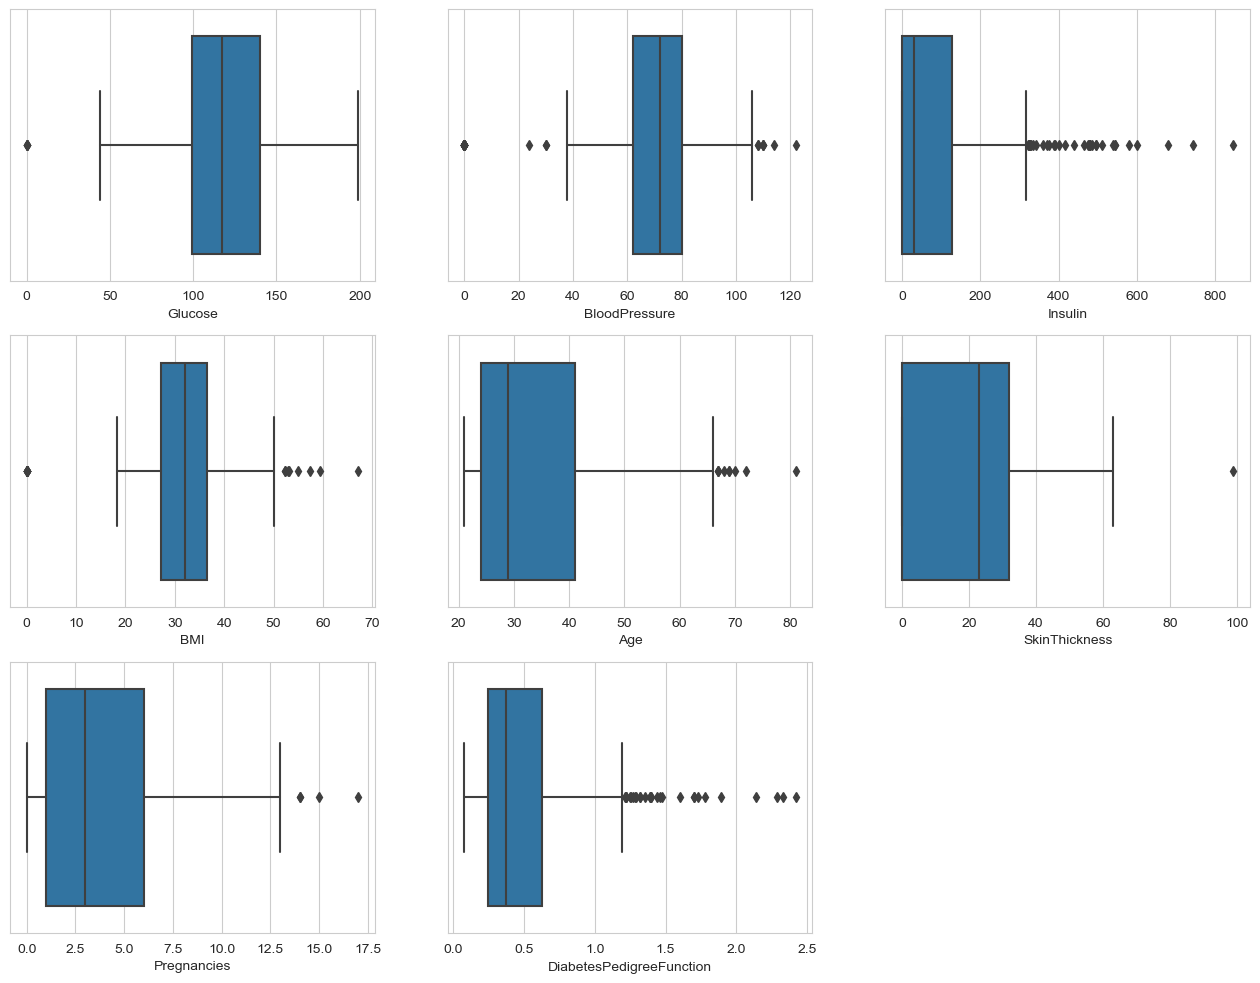

In [351]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

In [352]:
# We see that there are outliers in Blood pressure, BMI, Age, Pregnancies
# There are alot of outliers in Insulin and DiabetesPedigreeFunction

<Axes: xlabel='Outcome', ylabel='count'>

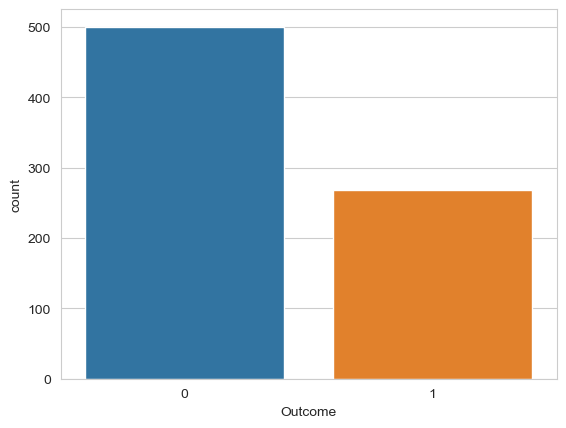

In [353]:
sns.countplot(x='Outcome', data=df)

In [354]:
# Here we see that the number of people having diabetes are less than that of people who doesn't ahve diabetes

### Data Preprocessing

In [355]:
df.shape

(768, 9)

In [356]:
#replacing 0 values with mean values if data is normally distributed and with median values if its a skewed distribution 
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

<Axes: >

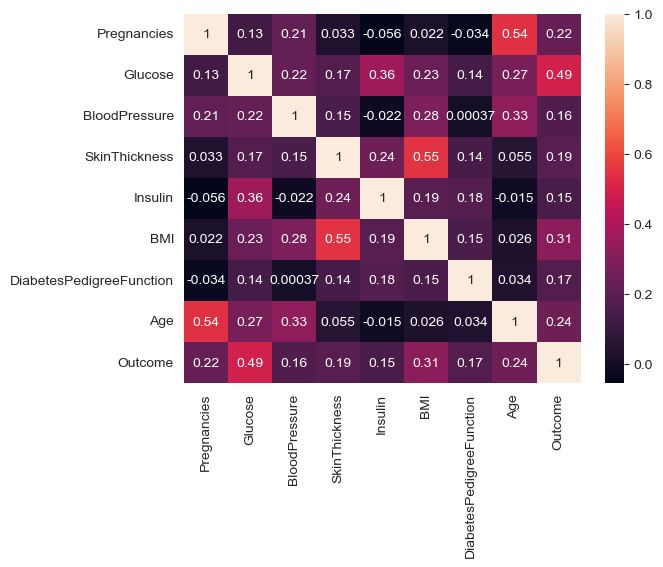

In [357]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [358]:
# We can observe that Glucose, BMI and Age are the most correlated with Outcome.
# BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated

In [367]:
# Treating Outliers

In [368]:
'''Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions.
Hence it is of utmost importance to deal with them. In this case removing outliers can cause data loss
so we have to deal with it using various scaling and transformation techniques'''

'Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions.\nHence it is of utmost importance to deal with them. In this case removing outliers can cause data loss\nso we have to deal with it using various scaling and transformation techniques'

In [369]:
# outlier filter

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [370]:
lower_bound

Pregnancies                  -6.500
Glucose                      39.000
BloodPressure                40.000
SkinThickness                 9.500
Insulin                    -114.625
BMI                          13.850
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

In [371]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [372]:
df.shape

(636, 9)

In [373]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [374]:
upper_bound

Pregnancies                  13.50000
Glucose                     189.00000
BloodPressure                99.00000
SkinThickness                43.00000
Insulin                     216.75000
BMI                          47.76250
DiabetesPedigreeFunction      1.09575
Age                          61.50000
Outcome                       2.50000
dtype: float64

In [375]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [376]:
df.shape

(568, 9)

<Axes: xlabel='DiabetesPedigreeFunction'>

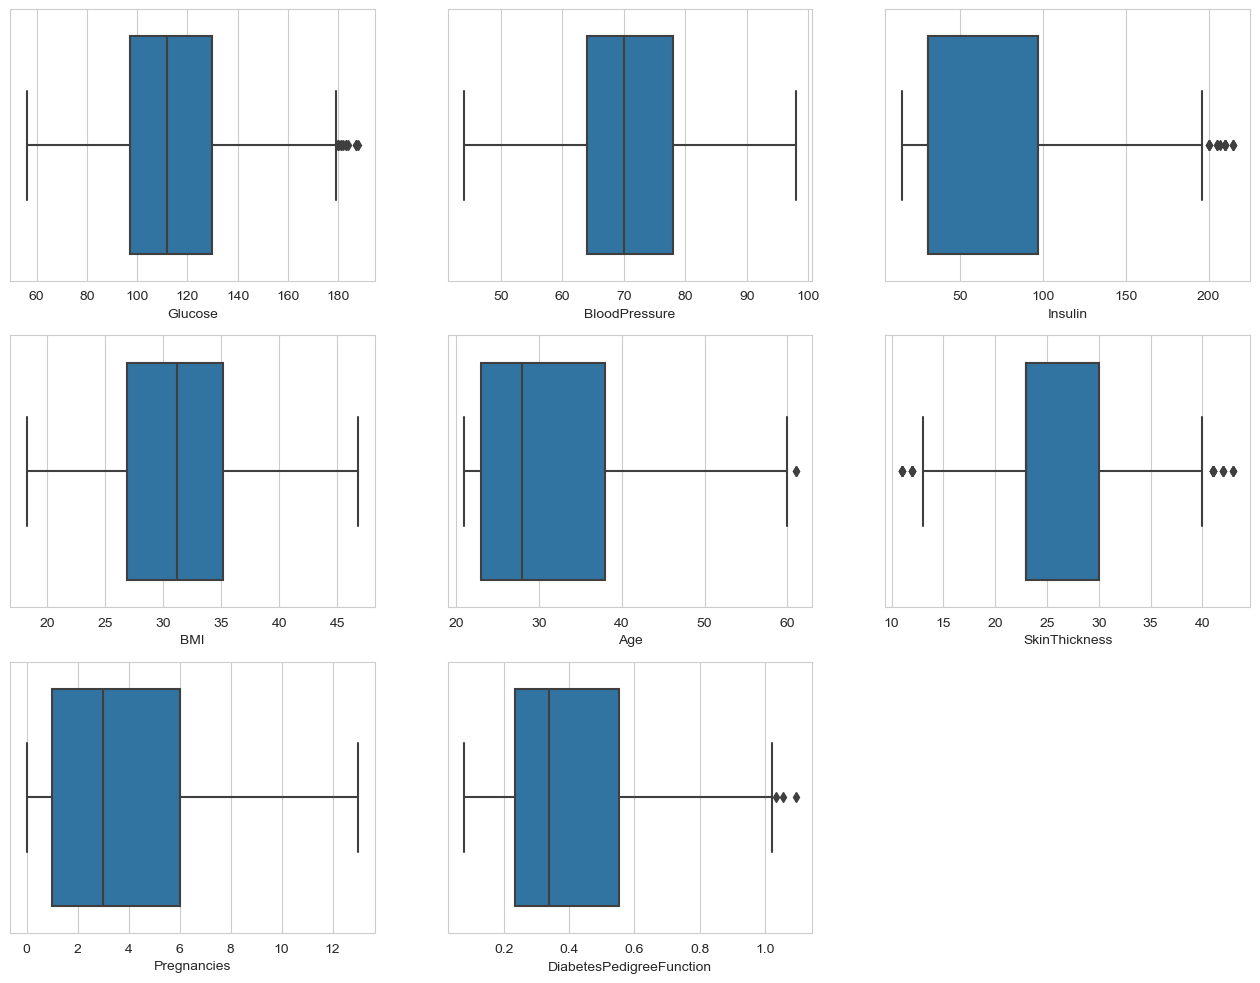

In [377]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

In [378]:
# Outliers are removed to some extent

In [379]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [380]:
lower_bound

Pregnancies                 -6.50000
Glucose                     47.50000
BloodPressure               43.00000
SkinThickness               12.50000
Insulin                    -69.25000
BMI                         14.50000
DiabetesPedigreeFunction    -0.24075
Age                          0.50000
Outcome                     -1.50000
dtype: float64

In [381]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [382]:
upper_bound

Pregnancies                  13.50000
Glucose                     179.50000
BloodPressure                99.00000
SkinThickness                40.50000
Insulin                     196.75000
BMI                          47.50000
DiabetesPedigreeFunction      1.02725
Age                          60.50000
Outcome                       2.50000
dtype: float64

In [383]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

<Axes: xlabel='DiabetesPedigreeFunction'>

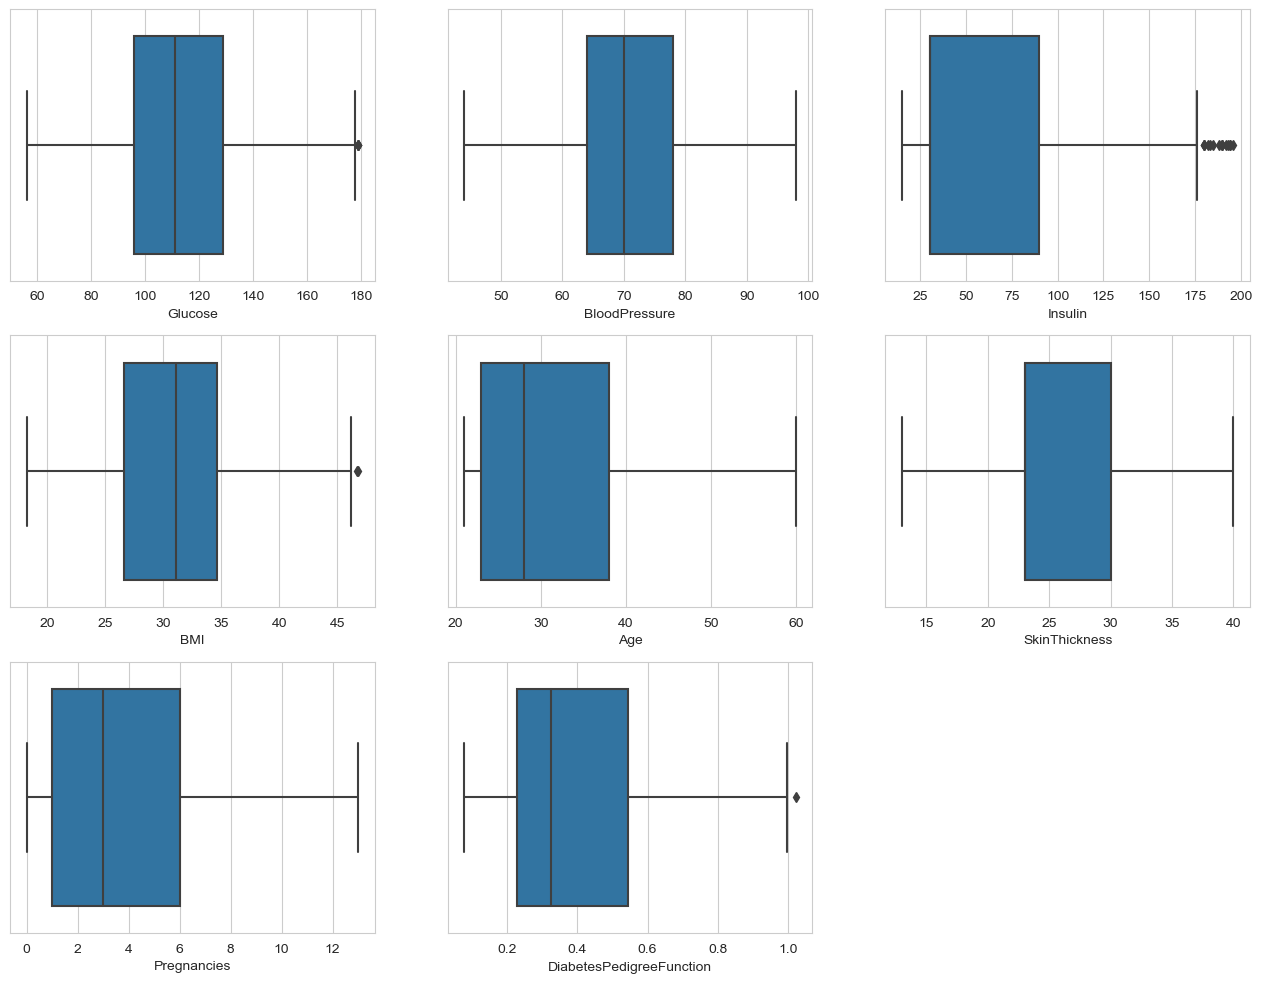

In [384]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

### Confidence values and hypothesis testing

In [385]:
import researchpy as rp

In [386]:
rp.ttest(group1= df['Glucose'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['Glucose'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N        Mean         SD        SE   95% Conf.    Interval
 0     Diabetes  142.0  132.287990  24.084301  2.021110  128.292394  136.283585
 1  NotDiabetes  371.0  106.885940  21.330624  1.107431  104.708292  109.063587
 2     combined  513.0  113.917306  24.859002  1.097552  111.761047  116.073565,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =    25.4021
 1                   Degrees of freedom =   511.0000
 2                                    t =    11.6349
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     1.1481
 7                            Hedge's g =     1.1464
 8                       Glass's delta1 =     1.0547
 9                     Point-Biserial r =     0.4576)

In [387]:
'''There is evidence to suggest that the average blood glucsoe concentration for diabetics M=132.28 (95% CI: 128.29, 136.28) was higher than non-diabetics, M= 106.88(95% CI: 104.70, 109.06); t= 11.63, p = 0.000 at the 95% confidence level (using independent t-test)
H0 : Avg. Glucose level of people who have diabetes = Avg. Glucose level of people who dont have diabetes

H1 : Avg. Glucose level of people who have diabetes > Avg. Glucose level of people who dont have diabetes

LEFT TAIL TEST'''

'There is evidence to suggest that the average blood glucsoe concentration for diabetics M=132.28 (95% CI: 128.29, 136.28) was higher than non-diabetics, M= 106.88(95% CI: 104.70, 109.06); t= 11.63, p = 0.000 at the 95% confidence level (using independent t-test)\nH0 : Avg. Glucose level of people who have diabetes = Avg. Glucose level of people who dont have diabetes\n\nH1 : Avg. Glucose level of people who have diabetes > Avg. Glucose level of people who dont have diabetes\n\nLEFT TAIL TEST'

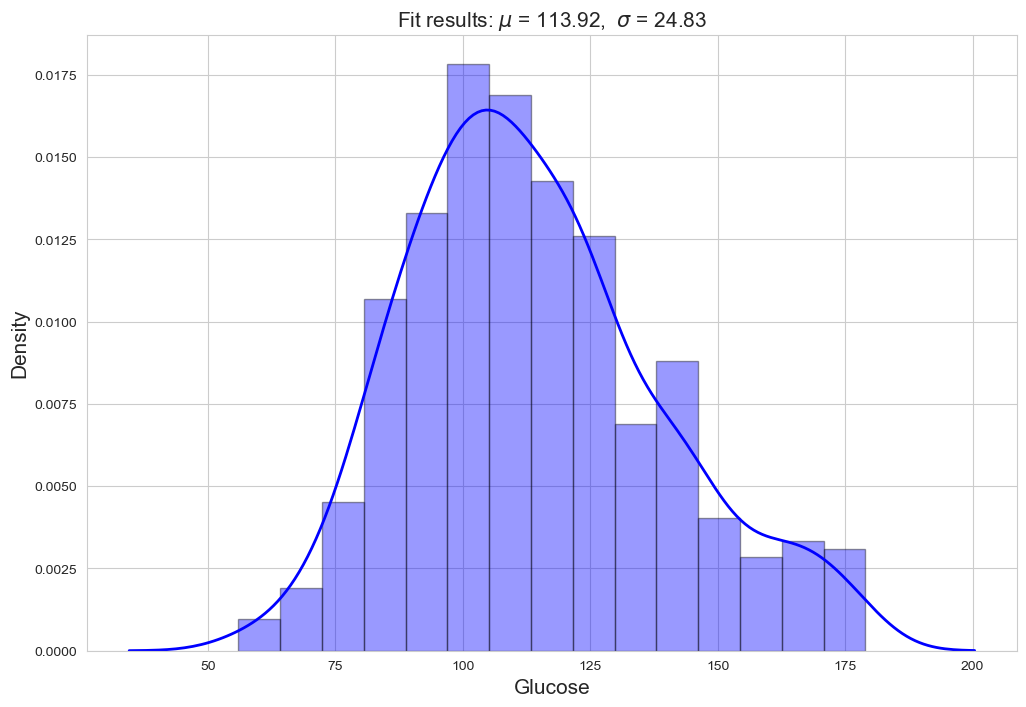

In [388]:
mu, std = norm.fit(df['Glucose'])
plt.figure(figsize = [12, 8])
sns.distplot(df['Glucose'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Glucose", size=15)
plt.ylabel("Density", size=15);

In [389]:
### Using stats library
stats.ttest_ind(df['Glucose'][df['Outcome'] == 1],
                df['Glucose'][df['Outcome'] == 0])

Ttest_indResult(statistic=11.634926577785663, pvalue=6.414912253263433e-28)

In [390]:
'''Ttest_indResult(statistic=11.6349, pvalue=6.414912253263433e-28)
p value < alpha , We have enough evidence to reject null hypothesis'''

'Ttest_indResult(statistic=11.6349, pvalue=6.414912253263433e-28)\np value < alpha , We have enough evidence to reject null hypothesis'

### Hypothesis test for Blood Pressure

In [391]:
rp.ttest(group1= df['BloodPressure'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['BloodPressure'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetes  142.0  73.051909   9.617800  0.807108  71.456312  74.647506
 1  NotDiabetes  371.0  70.088675  10.419120  0.540934  69.024985  71.152365
 2     combined  513.0  70.908907  10.280349  0.453888  70.017194  71.800620,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     2.9632
 1                   Degrees of freedom =   511.0000
 2                                    t =     2.9428
 3                Two side test p value =     0.0034
 4               Difference < 0 p value =     0.9983
 5               Difference > 0 p value =     0.0017
 6                            Cohen's d =     0.2904
 7                            Hedge's g =     0.2900
 8                       Glass's delta1 =     0.3081
 9                     Point-Biserial r =     0.1291)

In [392]:
'''H0 : Avg. BP of people who have diabetes = Avg. BP of people who do not have diabetes

H1 : Avg. BP of people who have diabetes > Avg. BP of people who do not have diabetes

RIGHT TAIL TEST

There is evidence to suggest that the average blood pressure for diabetics M=73.05 (95% CI: 71.45, 74.64) was higher than non-diabetics, M=70.08 (95% CI: 69.02, 71.15); t=2.94, p = 0.000 at the 95% confidence level (using independent t-test)

p value < alpha , We have enough evidence to reject null hypothesis.'''


'H0 : Avg. BP of people who have diabetes = Avg. BP of people who do not have diabetes\n\nH1 : Avg. BP of people who have diabetes > Avg. BP of people who do not have diabetes\n\nRIGHT TAIL TEST\n\nThere is evidence to suggest that the average blood pressure for diabetics M=73.05 (95% CI: 71.45, 74.64) was higher than non-diabetics, M=70.08 (95% CI: 69.02, 71.15); t=2.94, p = 0.000 at the 95% confidence level (using independent t-test)\n\np value < alpha , We have enough evidence to reject null hypothesis.'

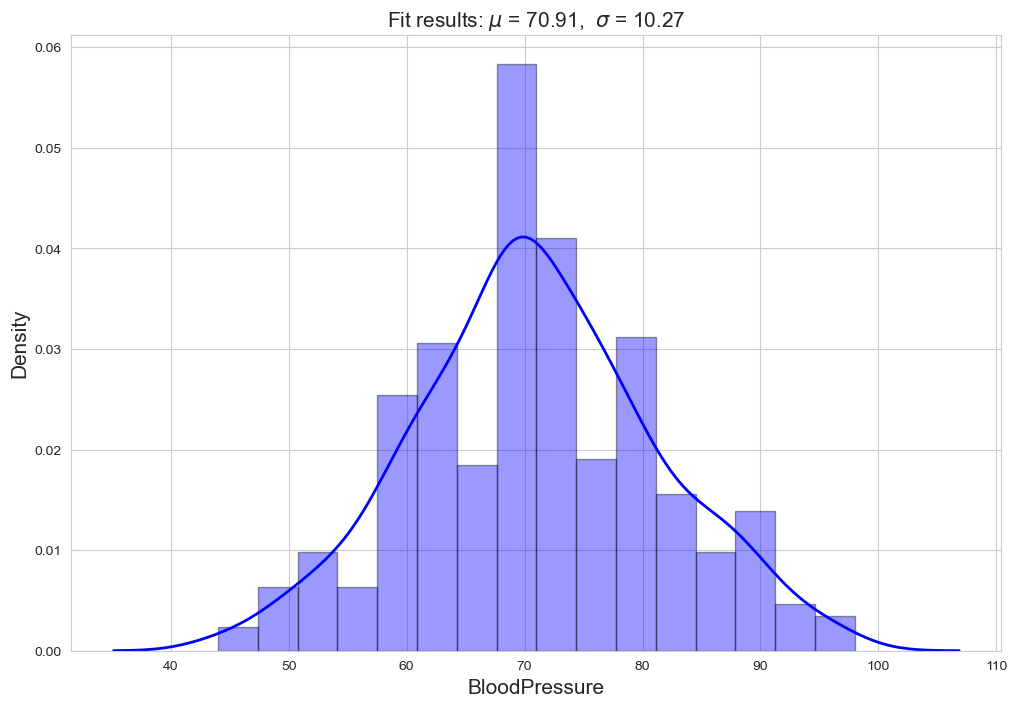

In [393]:
mu, std = norm.fit(df['BloodPressure'])
plt.figure(figsize = [12, 8])
sns.distplot(df['BloodPressure'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("BloodPressure", size=15)
plt.ylabel("Density", size=15);

### Hypothesis test for Insulin

In [395]:
rp.ttest(group1= df['Insulin'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['Insulin'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetes  142.0  65.376761  53.612022  4.499021  56.482504  74.271017
 1  NotDiabetes  371.0  60.454178  44.305625  2.300233  55.931008  64.977348
 2     combined  513.0  61.816764  47.063439  2.077902  57.734502  65.899027,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     4.9226
 1                   Degrees of freedom =   511.0000
 2                                    t =     1.0601
 3                Two side test p value =     0.2896
 4               Difference < 0 p value =     0.8552
 5               Difference > 0 p value =     0.1448
 6                            Cohen's d =     0.1046
 7                            Hedge's g =     0.1045
 8                       Glass's delta1 =     0.0918
 9                     Point-Biserial r =     0.0468)

In [396]:
'''H0 : Avg.Insulin of people who have diabetes = Avg. Insulin of people who do not have diabetes

H1 : Avg.Insulin of people who have diabetes > Avg. Insulin of people who do not have diabetes

RIGHT TAIL TEST

There is evidence to suggest that the average Insulin for diabetics M=65.37 (95% CI: 56.48 74.27) was higher than non-diabetics, M=60.45 (95% CI: 55.93 64.97); t(766)= 7.67, p = 0.000 at the 95% confidence level (using independent t-test)

p value < alpha , We have enough evidence to reject null hypothesis'''

'H0 : Avg.Insulin of people who have diabetes = Avg. Insulin of people who do not have diabetes\n\nH1 : Avg.Insulin of people who have diabetes > Avg. Insulin of people who do not have diabetes\n\nRIGHT TAIL TEST\n\nThere is evidence to suggest that the average Insulin for diabetics M=65.37 (95% CI: 56.48 74.27) was higher than non-diabetics, M=60.45 (95% CI: 55.93 64.97); t(766)= 7.67, p = 0.000 at the 95% confidence level (using independent t-test)\n\np value < alpha , We have enough evidence to reject null hypothesis'

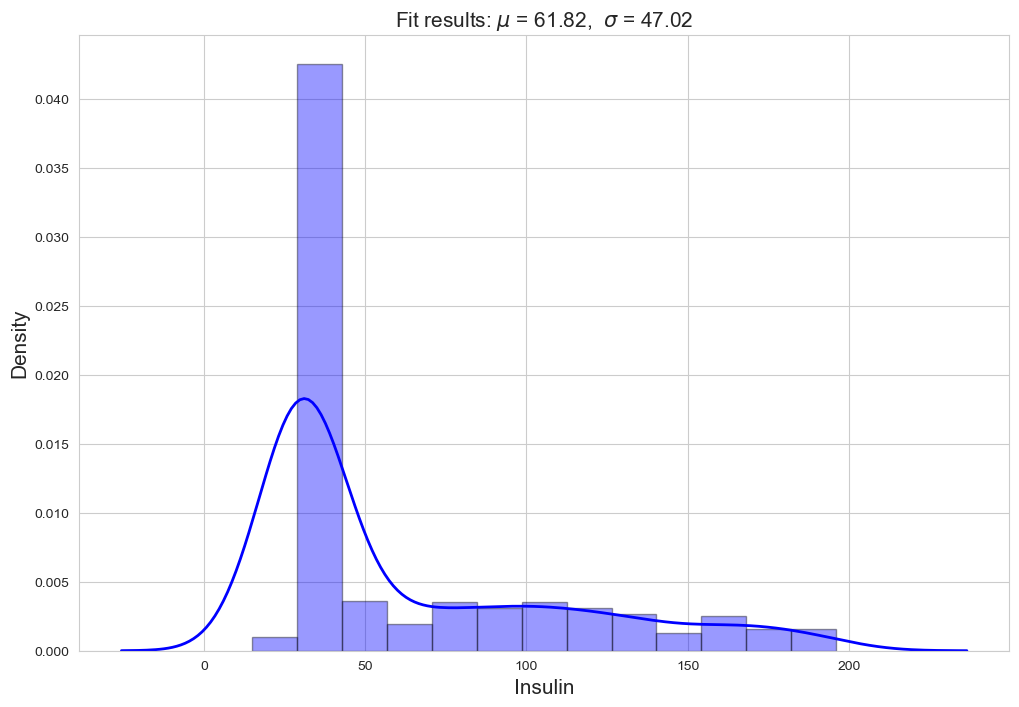

In [397]:
mu, std = norm.fit(df['Insulin'])
plt.figure(figsize = [12, 8])
sns.distplot(df['Insulin'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Insulin", size=15)
plt.ylabel("Density", size=15);

### Hypothesis test for BMI

In [398]:
rp.ttest(group1= df['BMI'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['BMI'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N       Mean        SD        SE  95% Conf.   Interval
 0     Diabetes  142.0  33.570423  5.224951  0.438468  32.703601  34.437244
 1  NotDiabetes  371.0  30.164420  5.891568  0.305875  29.562949  30.765892
 2     combined  513.0  31.107212  5.910062  0.260936  30.594576  31.619849,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     3.4060
 1                   Degrees of freedom =   511.0000
 2                                    t =     6.0391
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.5959
 7                            Hedge's g =     0.5951
 8                       Glass's delta1 =     0.6519
 9                     Point-Biserial r =     0.2581)

In [399]:
'''H0 : Avg.BMI of people who have diabetes = Avg. BMI of people who do not have diabetes

H1 : Avg.BMI of people who have diabetes > Avg. BMI of people who do not have diabetes

RIGHT TAIL TEST

There is evidence to suggest that the average BMI for diabetics M= 33.57 (95% CI: 32.70 36.34.43) was higher than non-diabetics, M=30.16 (95% CI: 29.56 30.76); t= 6.0391, p = 0.000 at the 95% confidence level (using independent t-test)

p value < alpha , We have enough evidence to reject null hypothesis'''

'H0 : Avg.BMI of people who have diabetes = Avg. BMI of people who do not have diabetes\n\nH1 : Avg.BMI of people who have diabetes > Avg. BMI of people who do not have diabetes\n\nRIGHT TAIL TEST\n\nThere is evidence to suggest that the average BMI for diabetics M= 33.57 (95% CI: 32.70 36.34.43) was higher than non-diabetics, M=30.16 (95% CI: 29.56 30.76); t= 6.0391, p = 0.000 at the 95% confidence level (using independent t-test)\n\np value < alpha , We have enough evidence to reject null hypothesis'

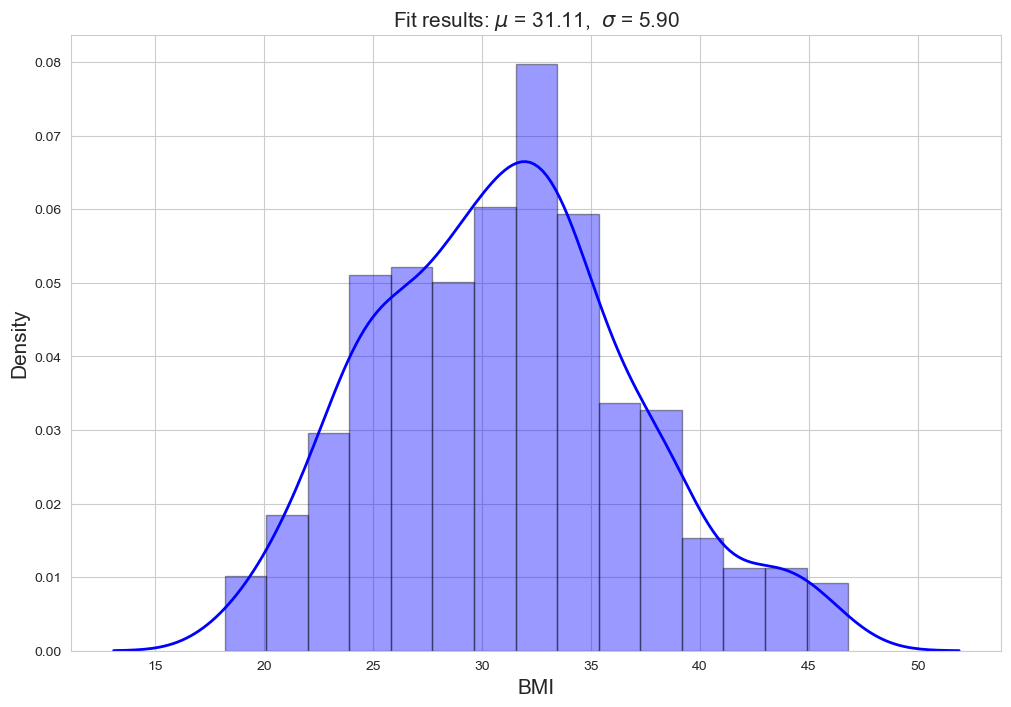

In [400]:
mu, std = norm.fit(df['BMI'])
plt.figure(figsize = [12, 8])
sns.distplot(df['BMI'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("BMI", size=15)
plt.ylabel("Density", size=15);


### Hypothesis test for Diabetes Pedigree Function

In [401]:
rp.ttest(group1= df['DiabetesPedigreeFunction'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['DiabetesPedigreeFunction'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Diabetes  142.0  0.448563  0.236455  0.019843   0.409335  0.487791
 1  NotDiabetes  371.0  0.373658  0.214293  0.011126   0.351781  0.395535
 2     combined  513.0  0.394392  0.222953  0.009844   0.375053  0.413731,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     0.0749
 1                   Degrees of freedom =   511.0000
 2                                    t =     3.4405
 3                Two side test p value =     0.0006
 4               Difference < 0 p value =     0.9997
 5               Difference > 0 p value =     0.0003
 6                            Cohen's d =     0.3395
 7                            Hedge's g =     0.3390
 8                       Glass's delta1 =     0.3168
 9                     Point-Biserial r =     0.1505)

In [402]:
'''H0 : Avg.Diabetes Pedigree Function of people who have diabetes = Avg. Diabetes Pedigree Function of people who do not have diabetes

H1 : Avg.Diabetes Pedigree Function of people who have diabetes > Avg.Diabetes Pedigree Function of people who do not have diabetes

RIGHT TAIL TEST

There is evidence to suggest that the average Insulin for diabetics M= 0.44 (95% CI: 0.40 0.48) was higher than non-diabetics, M=0.37 (95% CI: 0.35 0.39); t= 3.44, p = 0.000 at the 95% confidence level (using independent t-test)

p value < alpha , We have enough evidence to reject null hypothesis'''

'H0 : Avg.Diabetes Pedigree Function of people who have diabetes = Avg. Diabetes Pedigree Function of people who do not have diabetes\n\nH1 : Avg.Diabetes Pedigree Function of people who have diabetes > Avg.Diabetes Pedigree Function of people who do not have diabetes\n\nRIGHT TAIL TEST\n\nThere is evidence to suggest that the average Insulin for diabetics M= 0.44 (95% CI: 0.40 0.48) was higher than non-diabetics, M=0.37 (95% CI: 0.35 0.39); t= 3.44, p = 0.000 at the 95% confidence level (using independent t-test)\n\np value < alpha , We have enough evidence to reject null hypothesis'

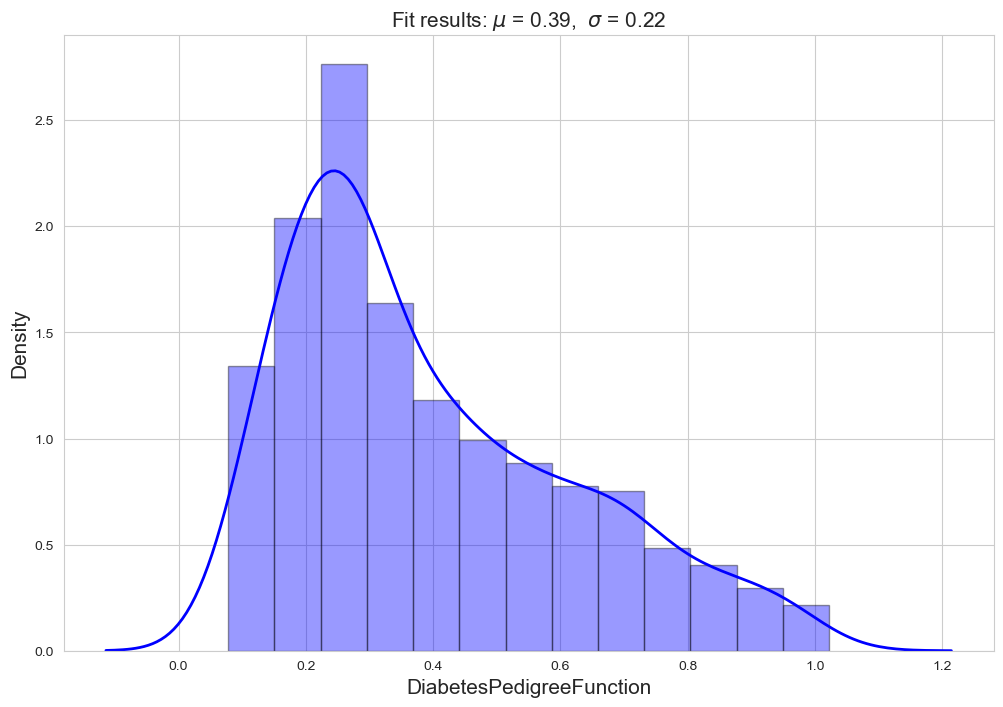

In [403]:
mu, std = norm.fit(df['DiabetesPedigreeFunction'])
plt.figure(figsize = [12, 8])
sns.distplot(df['DiabetesPedigreeFunction'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("DiabetesPedigreeFunction", size=15)
plt.ylabel("Density", size=15);

### Hypothesis Test for Age

In [253]:
rp.ttest(group1= df['Age'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['Age'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N       Mean        SD        SE  95% Conf.   Interval
 0     Diabetes  142.0  35.732394  9.812364  0.823435  34.104519  37.360270
 1  NotDiabetes  371.0  29.876011  9.580145  0.497376  28.897972  30.854050
 2     combined  513.0  31.497076  9.985952  0.440891  30.630899  32.363253,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     5.8564
 1                   Degrees of freedom =   511.0000
 2                                    t =     6.1533
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.6072
 7                            Hedge's g =     0.6063
 8                       Glass's delta1 =     0.5968
 9                     Point-Biserial r =     0.2627)

In [404]:
'''H0 : Avg.Age of people who have diabetes = Avg.Age of people who do not have diabetes

H1 : Avg.Age of people who have diabetes > Avg.Age of people who do not have diabetes

RIGHT TAIL TEST

There is evidence to suggest that the average Insulin for diabetics M= 35.7 (95% CI: 34.10 37.36) was higher than non-diabetics, M= 29.87 (95% CI: 28.89 30.85); t= 6.15, p = 0.000 at the 95% confidence level (using independent t-test)

p value < alpha , We have enough evidence to reject null hypothesis'''

'H0 : Avg.Age of people who have diabetes = Avg.Age of people who do not have diabetes\n\nH1 : Avg.Age of people who have diabetes > Avg.Age of people who do not have diabetes\n\nRIGHT TAIL TEST\n\nThere is evidence to suggest that the average Insulin for diabetics M= 35.7 (95% CI: 34.10 37.36) was higher than non-diabetics, M= 29.87 (95% CI: 28.89 30.85); t= 6.15, p = 0.000 at the 95% confidence level (using independent t-test)\n\np value < alpha , We have enough evidence to reject null hypothesis'

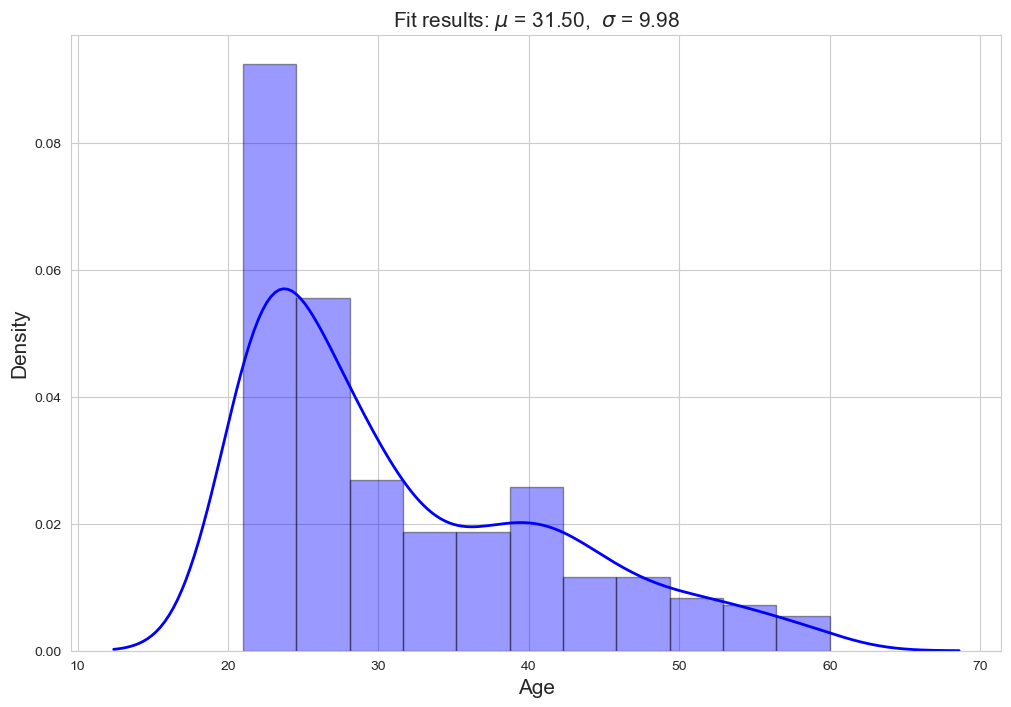

In [405]:
mu, std = norm.fit(df['Age'])
plt.figure(figsize = [12, 8])
sns.distplot(df['Age'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Age", size=15)
plt.ylabel("Density", size=15);

In [406]:
# splitiing the dataframe in X and y

X = df.drop("Outcome", axis=1) #dropping the Outcome column and keeping all other columns as X
y = df.Outcome 


In [407]:
X.head() # we can only see independent features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
3,1,89.0,66.0,23,94.0,28.1,0.167,21
5,5,116.0,74.0,23,30.5,25.6,0.201,30
6,3,78.0,50.0,32,88.0,31.0,0.248,26


In [408]:
y.head() # Dependent feature

0    1
1    0
3    0
5    0
6    1
Name: Outcome, dtype: int64

In [409]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [410]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(410, 8)
(103, 8)
(410,)
(103,)


In [411]:
#  Observations after preprocessing
# - Rows with missing values are replaced with mean/median
# - Independent and dependent features have been separated into X and y.
# -Outliers are been treated
# - The dataset has been split into train and test sets for model evaluation.
# Age, Glucose level, DiabetesPedigreeFunction has significant effect on target variable

### LOGISTIC REGRESSION

In [412]:
model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

model_score = model.score(X_test, y_test)

print(f"R-square : {model_score}")

R-square : 0.7766990291262136


In [413]:
cm=confusion_matrix(y_predict,y_test)
print(cm)

[[67 17]
 [ 6 13]]


### PERFORMANCE METRICS
### TRAIN DATA

In [414]:
print(f"precision : {precision_score(y_train,y_predict_train)}")
print(f"Recall : {recall_score(y_train,y_predict_train)}")
print(f"Accuracy : {accuracy_score(y_train,y_predict_train)}")
print(f"F1 Score : {f1_score(y_train,y_predict_train)}")
print(f"Auc score : {roc_auc_score(y_train,y_predict_train)}")

precision : 0.6901408450704225
Recall : 0.4375
Accuracy : 0.7926829268292683
F1 Score : 0.5355191256830601
Auc score : 0.6818372483221476


### For Test data 

In [265]:
print(f"precision : {precision_score(y_test,y_predict)}")
print(f"Recall : {recall_score(y_test,y_predict)}")
print(f"Accuracy : {accuracy_score(y_test,y_predict)}")
print(f"F1 Score : {f1_score(y_test,y_predict)}")
print(f"Auc score : {roc_auc_score(y_test,y_predict)}")

precision : 0.6842105263157895
Recall : 0.43333333333333335
Accuracy : 0.7766990291262136
F1 Score : 0.5306122448979592
Auc score : 0.6755707762557077


### ROC CURVE

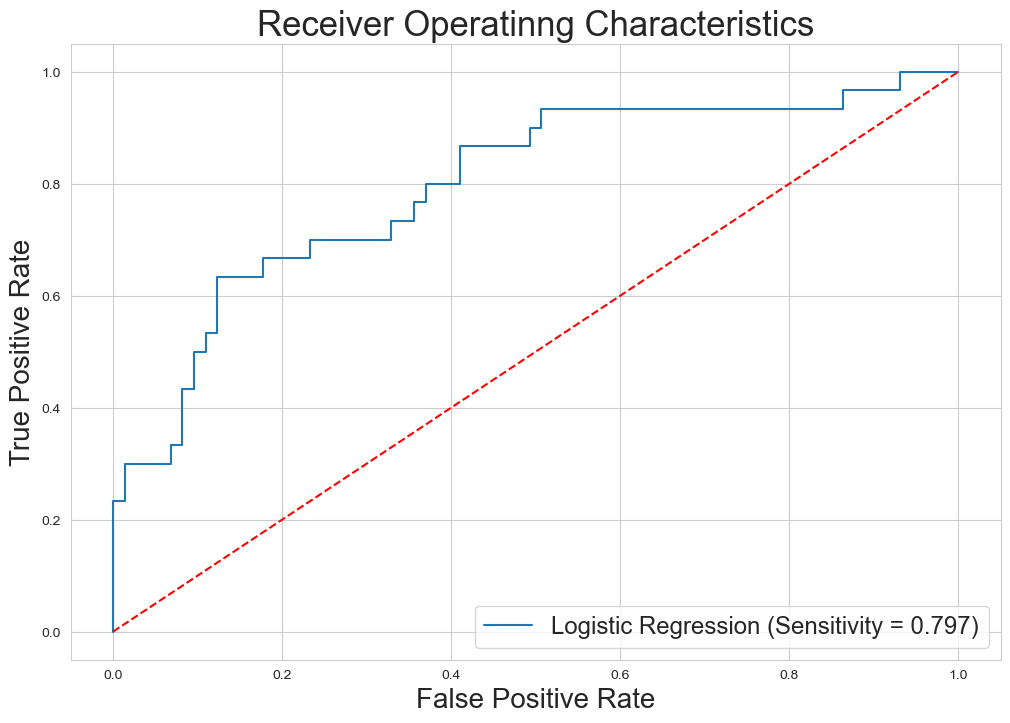

In [415]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()


In [417]:
# AUC score for LR model is 0.797

### CLASS WISE PERFORMANCE

In [418]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        73
           1       0.68      0.43      0.53        30

    accuracy                           0.78       103
   macro avg       0.74      0.68      0.69       103
weighted avg       0.76      0.78      0.76       103



### Feature importance

In [419]:
# feature importance is on basis of coefficient

In [420]:
model.coef_

array([[ 0.01830572,  0.03851671, -0.03204257,  0.01516836, -0.00672564,
         0.03845824,  1.57572129,  0.03984041]])

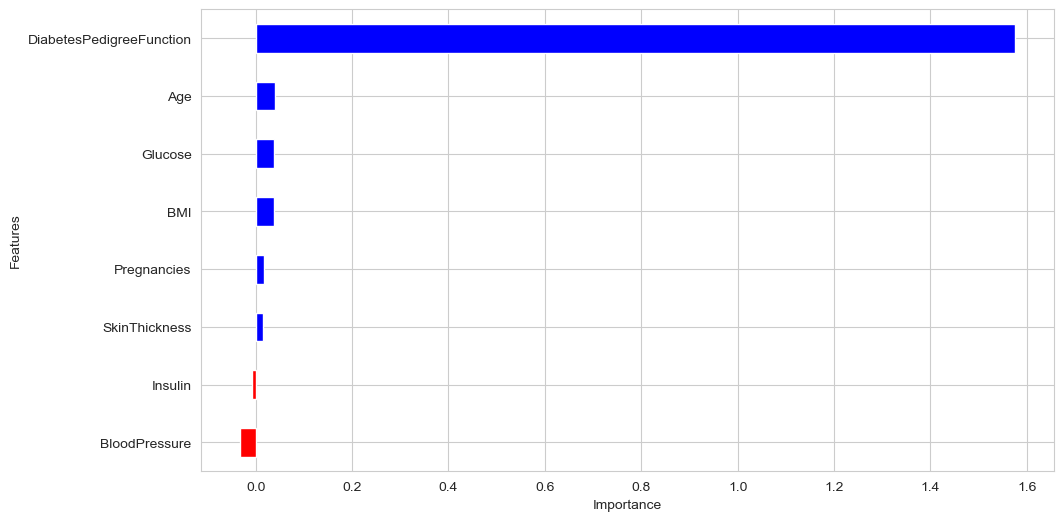

In [421]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');


### Fit another model on basis of just above important features

In [422]:
df.drop(['BloodPressure','SkinThickness','Insulin'], axis = 1, inplace=True)

# Dropping all columns except DiabetesPedigreeFunction, BMI, Glucose and Age are key variables we will 
# do another LR with only these parameters.

In [423]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
# definine X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
# Splitting the data so 20% is for testing

model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

model_score = model.score(X_test, y_test)

print(f"R-square : {model_score}")

R-square : 0.7829457364341085


### CONFUSION MATRIX

In [424]:
cm=confusion_matrix(y_predict,y_test)
print(cm)

[[85 17]
 [11 16]]


### PERFORMANCE METRICS
#### TRAIN DATA

In [425]:
print(f"precision : {precision_score(y_train,y_predict_train)}")
print(f"Recall : {recall_score(y_train,y_predict_train)}")
print(f"Accuracy : {accuracy_score(y_train,y_predict_train)}")
print(f"F1 Score : {f1_score(y_train,y_predict_train)}")
print(f"Auc score : {roc_auc_score(y_train,y_predict_train)}")

precision : 0.6805555555555556
Recall : 0.44954128440366975
Accuracy : 0.7838541666666666
F1 Score : 0.5414364640883979
Auc score : 0.682952460383653


#### TEST DATA

In [426]:
print(f"precision : {precision_score(y_test,y_predict)}")
print(f"Recall : {recall_score(y_test,y_predict)}")
print(f"Accuracy : {accuracy_score(y_test,y_predict)}")
print(f"F1 Score : {f1_score(y_test,y_predict)}")
print(f"Auc score : {roc_auc_score(y_test,y_predict)}")

precision : 0.5925925925925926
Recall : 0.48484848484848486
Accuracy : 0.7829457364341085
F1 Score : 0.5333333333333333
Auc score : 0.6851325757575758


### ROC CURVE

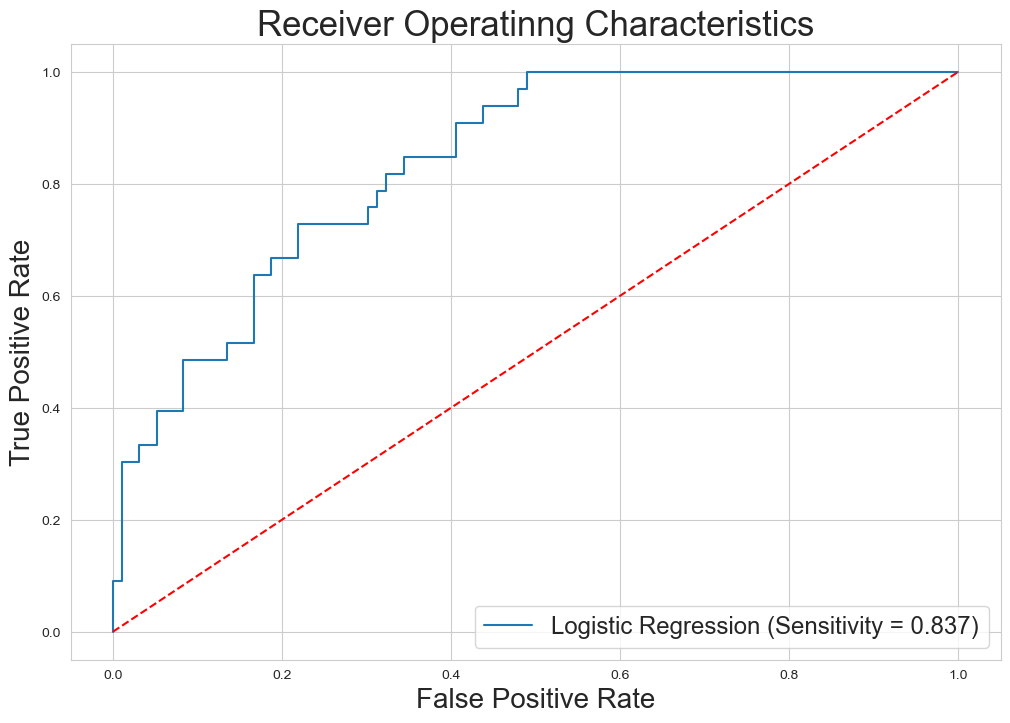

In [427]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()

In [428]:
# # AUC score for LR model is 0.837

### CLASS WISE PERFORMANCE

In [429]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        96
           1       0.59      0.48      0.53        33

    accuracy                           0.78       129
   macro avg       0.71      0.69      0.70       129
weighted avg       0.77      0.78      0.78       129



### Feature importance

In [430]:
model.coef_

array([[0.08402333, 0.04025421, 0.12023203, 0.95568789, 0.03069947]])

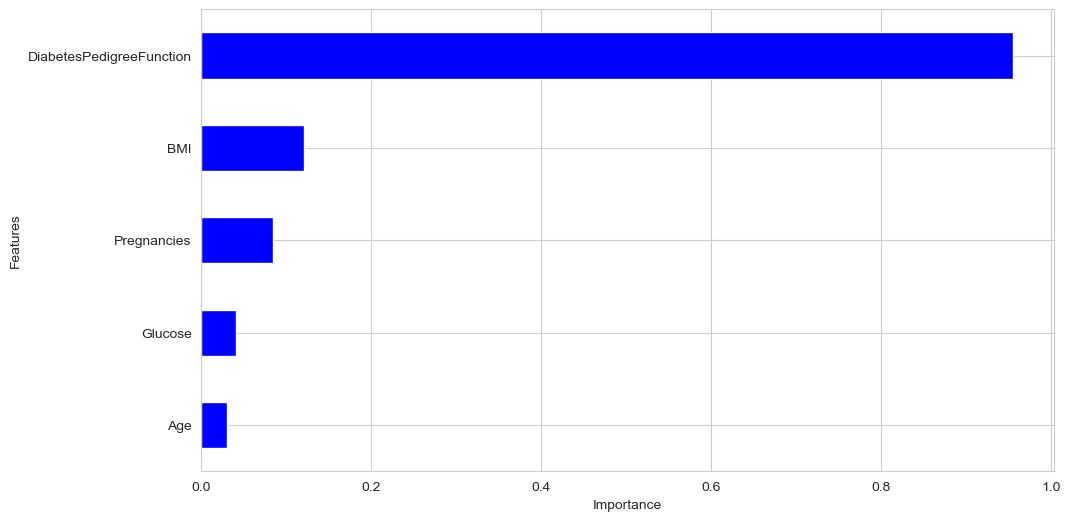

In [431]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

### KNN CLASSIFICATION

In [432]:
def best_k_for_knn(X_train, X_test, y_train, y_test, max_no_of_neighbors):
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    auc_score = []
    k_values = []

    for i in range(1, max_no_of_neighbors):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        k_values.append(i)
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        auc_score.append(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))
        print("------------------For Neighbours =", i, "------------------------")
        print("\nConfusion Matrix is:\n", confusion_matrix(y_test, y_pred))
        print("\nPrecision Score is:\n", precision_score(y_test, y_pred))
        print("\nRecall Score is:\n", recall_score(y_test, y_pred))
        print("\nAccuracy Score is:\n", accuracy_score(y_test, y_pred))
        print("\nF1 Score is:\n", f1_score(y_test, y_pred))
        print("\nAUC score is:\n", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

    # Plotting precision, recall, and accuracy
    plt.plot(k_values, precision_scores, label='Precision')
    plt.plot(k_values, recall_scores, label='Recall')
    plt.plot(k_values, accuracy_scores, label='Accuracy')
    plt.plot(k_values, auc_score , label ='AUC Score')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs. Number of Neighbors')
    plt.legend()
    plt.show()

------------------For Neighbours = 1 ------------------------

Confusion Matrix is:
 [[71 25]
 [18 15]]

Precision Score is:
 0.375

Recall Score is:
 0.45454545454545453

Accuracy Score is:
 0.6666666666666666

F1 Score is:
 0.410958904109589

AUC score is:
 0.5970643939393939
------------------For Neighbours = 2 ------------------------

Confusion Matrix is:
 [[85 11]
 [25  8]]

Precision Score is:
 0.42105263157894735

Recall Score is:
 0.24242424242424243

Accuracy Score is:
 0.7209302325581395

F1 Score is:
 0.3076923076923077

AUC score is:
 0.6933396464646464
------------------For Neighbours = 3 ------------------------

Confusion Matrix is:
 [[81 15]
 [18 15]]

Precision Score is:
 0.5

Recall Score is:
 0.45454545454545453

Accuracy Score is:
 0.7441860465116279

F1 Score is:
 0.47619047619047616

AUC score is:
 0.7353219696969698
------------------For Neighbours = 4 ------------------------

Confusion Matrix is:
 [[88  8]
 [20 13]]

Precision Score is:
 0.6190476190476191

Re

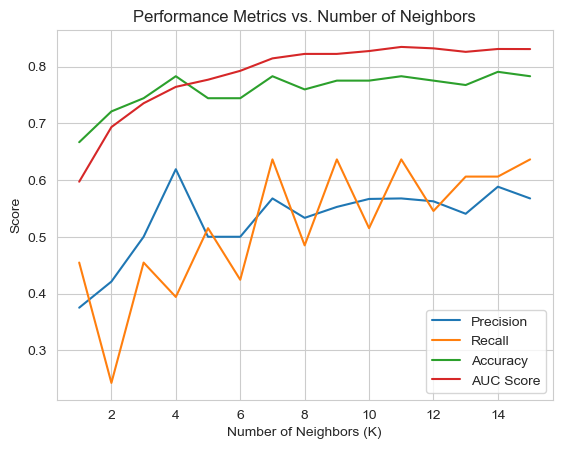

In [437]:
best_k_for_knn(X_train, X_test, y_train, y_test,16)

In [434]:
'''PRECISION
Out of total times it predictive positive, it predicted correct positive.
PRECISION = TP/TP+FP False Positive is incorrectly predicting positive. Person didnt had diabetes but saying it has diabetes. MORE SEVERE IS SAYING DIABETIC AS NON DIABETIC Therefore Recall is more important.

RECALL
Out of actual no. of positive , it predicted correct positive.
Predicting Diabetic as Diabetic RECALL = TP/TP+FN False Negative is , incorrectly predicting as negative. Actual had diabetes but saying didnt have diabetes. so, Recall has to be high. therefore k = 11'''

'PRECISION\nOut of total times it predictive positive, it predicted correct positive.\nPRECISION = TP/TP+FP False Positive is incorrectly predicting positive. Person didnt had diabetes but saying it has diabetes. MORE SEVERE IS SAYING DIABETIC AS NON DIABETIC Therefore Recall is more important.\n\nRECALL\nOut of actual no. of positive , it predicted correct positive.\nPredicting Diabetic as Diabetic RECALL = TP/TP+FN False Negative is , incorrectly predicting as negative. Actual had diabetes but saying didnt have diabetes. so, Recall has to be high. therefore k = 11'

### Plot ROC for for k = 11

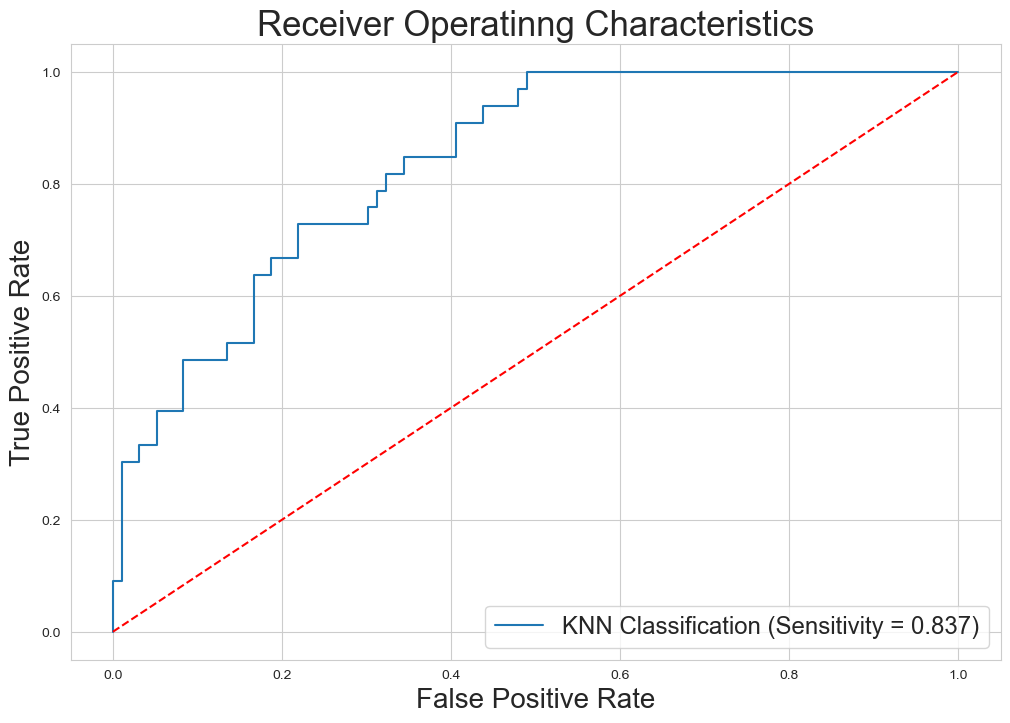

In [438]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="KNN Classification (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()


In [436]:
# AUC score for LR model is 0.837

 
 ------------------For Neighbours = 11 ------------------------

Confusion Matrix is:
 [[80 16]
 [12 21]]

Precision Score is:
 0.5675675675675675

Recall Score is:
 0.6363636363636364

Accuracy Score is:
 0.7829457364341085

F1 Score is:
 0.6000000000000001

AUC score is:
 0.8345959595959597

### DECISION TREE

In [439]:
def best_depth_for_dt(X_train, X_test, y_train, y_test, max_no_of_neighbors):
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    depth_values = []
    auc_score = []
    for i in range(1, max_no_of_neighbors):
        dtree = DecisionTreeClassifier(max_depth=i, criterion='gini')
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)

        depth_values.append(i)
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        auc_score.append(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

        print("------------------For Depth =", i, "------------------------")
        print("\nConfusion Matrix is:\n", confusion_matrix(y_test, y_pred))
        print("\nPrecision Score is:\n", precision_score(y_test, y_pred))
        print("\nRecall Score is:\n", recall_score(y_test, y_pred))
        print("\nAccuracy Score is:\n", accuracy_score(y_test, y_pred))
        print("\nF1 Score is:\n", f1_score(y_test, y_pred))
        print("\nAUC score is:\n", roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

    # Plotting precision, recall, and accuracy
    plt.plot(depth_values, precision_scores, label='Precision')
    plt.plot(depth_values, recall_scores, label='Recall')
    plt.plot(depth_values, accuracy_scores, label='Accuracy')
    plt.plot(depth_values, auc_score, label='AUC SCORE')

    plt.xlabel('Depth')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs. Depth')
    plt.legend()
    plt.show()

------------------For Depth = 1 ------------------------

Confusion Matrix is:
 [[77 19]
 [11 22]]

Precision Score is:
 0.5365853658536586

Recall Score is:
 0.6666666666666666

Accuracy Score is:
 0.7674418604651163

F1 Score is:
 0.5945945945945946

AUC score is:
 0.734375
------------------For Depth = 2 ------------------------

Confusion Matrix is:
 [[86 10]
 [18 15]]

Precision Score is:
 0.6

Recall Score is:
 0.45454545454545453

Accuracy Score is:
 0.7829457364341085

F1 Score is:
 0.5172413793103449

AUC score is:
 0.7541035353535352
------------------For Depth = 3 ------------------------

Confusion Matrix is:
 [[86 10]
 [18 15]]

Precision Score is:
 0.6

Recall Score is:
 0.45454545454545453

Accuracy Score is:
 0.7829457364341085

F1 Score is:
 0.5172413793103449

AUC score is:
 0.7119633838383839
------------------For Depth = 4 ------------------------

Confusion Matrix is:
 [[89  7]
 [25  8]]

Precision Score is:
 0.5333333333333333

Recall Score is:
 0.2424242424242424

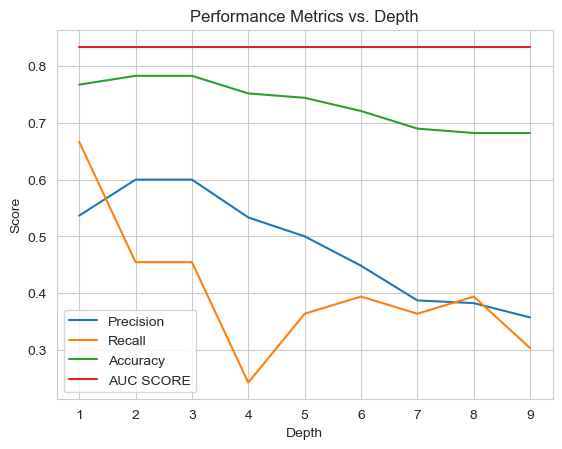

In [440]:
best_depth_for_dt(X_train, X_test, y_train, y_test,10)


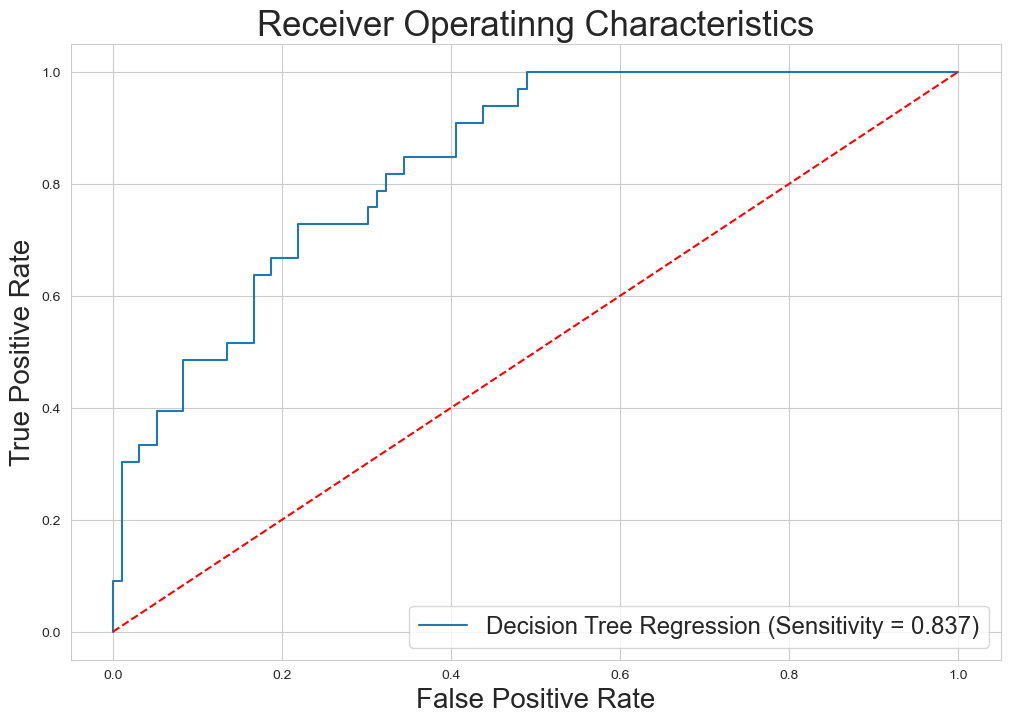

In [442]:
dtree = DecisionTreeClassifier(max_depth=2, criterion='gini')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Decision Tree Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()


''' Logistic Regression has better Accuracy, Precision, Recall and F1 score among the three models
It performs relatively well in predicting positive cases compared to the other models''' 